In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as colors
import seaborn as sns
sns.set()
#sns.set_palette("Set1")
#sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")

# (Section 1) Before neural networks: Logistic regression

## 1.1 The iris dataset

In [2]:
iris = sns.load_dataset("iris")

In [3]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [4]:
list_of_species = list(set(iris.species))
print(list_of_species)

['setosa', 'virginica', 'versicolor']


In [5]:
iris.shape

(150, 5)

In [6]:
iris.species.value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

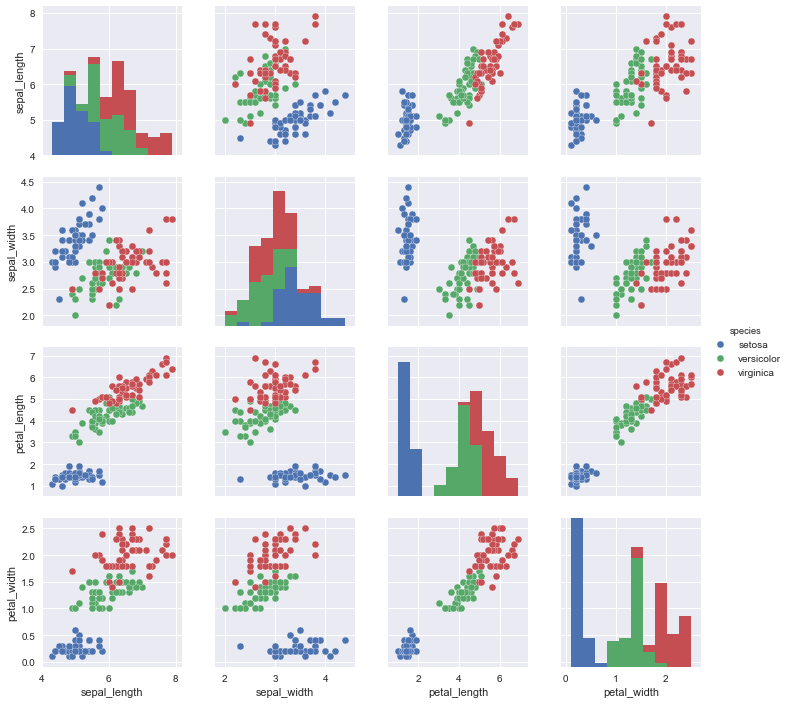

In [16]:
_ = sns.pairplot(iris, hue="species")

In [8]:
def plot_histogram(my_species,feature,n_bins=20,normed=None,data=iris):
    """Plot a histogram of the given feature according to a given species."""
    mask = data['species']==my_species
    hist0 = data[feature][~mask]
    hist1 = data[feature][mask]
    histograms = [hist0,hist1]
    labels = ['not '+my_species, my_species]
    fig,ax = plt.subplots(figsize=(12,5))
    plt.hist(histograms, histtype='bar',bins=n_bins,normed=normed,label=labels);
    plt.title(my_species,fontsize='xx-large')
    plt.xlabel(feature,fontsize='x-large')
    plt.legend(fontsize='x-large')
    ax.tick_params(labelsize='large')

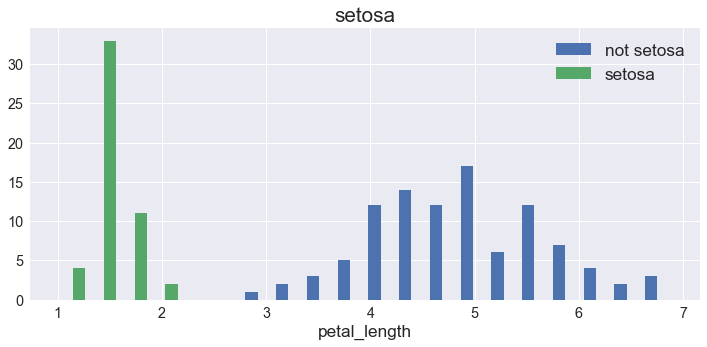

In [9]:
plot_histogram('setosa','petal_length')

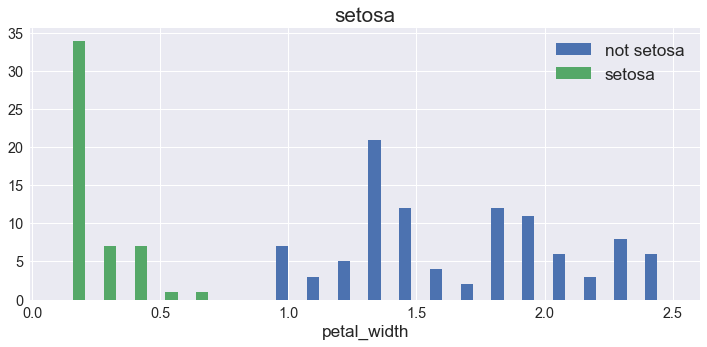

In [10]:
plot_histogram('setosa','petal_width')

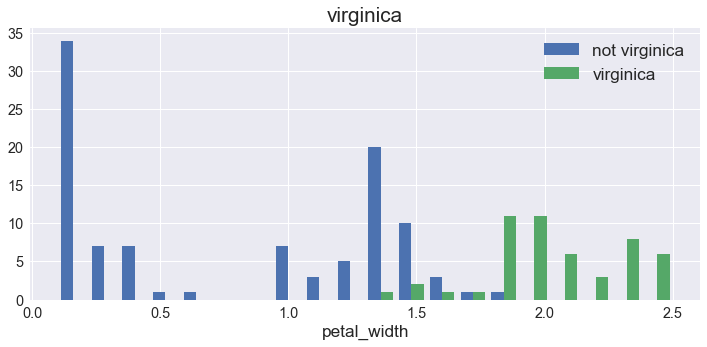

In [11]:
plot_histogram('virginica','petal_width')

# Problem we want to address: knowing the petal width, predict if the iris is a virginica

## 1.2 Logistic regression with sklearn: guessing virginica knowing the petal width

In [12]:
x = iris['petal_width'].reshape(-1,1)

In [13]:
y = iris.species.apply(lambda x: 1 if x=='virginica' else 0)

In [14]:
import sklearn.model_selection
import sklearn.linear_model
x_train, x_test, y_train, y_test = \
sklearn.model_selection.train_test_split(x,y,test_size = 0.2,random_state=0)

In [ ]:
model_sklearn = sklearn.linear_model.LogisticRegression()

In [ ]:
model_sklearn.fit(x_train,y_train)

In [ ]:
plot_histogram('virginica','petal_width',normed=True)
petal_widths = np.arange(0,3,0.01)
predicted_proba = model_sklearn.predict_proba(petal_widths.reshape(-1,1))[:,1]
plt.plot(petal_widths,predicted_proba,'r--',label='predicted proba')
plt.plot([0,3],[.5,.5],'k--',linewidth=1)
plt.legend(fontsize='x-large')
plt.yticks([0,0.5,1]);

In [ ]:
accuracy_train = model_sklearn.score(x_train,y_train)
print(accuracy_train)
# normally the score should be 0.958333 = 115/120
# knowing that there are 5 misclassified, on a total of 120=x_train.shape[0]

In [ ]:
accuracy_test = model_sklearn.score(x_test,y_test)
print(accuracy_test)

# Keras

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import regularizers
from keras import optimizers

In [ ]:
model_keras = Sequential()

In [ ]:
layer0 = Dense(1,input_dim=1,kernel_regularizer=regularizers.l2(.1))
model_keras.add(layer0)

In [ ]:
layer1 = Activation('sigmoid')
model_keras.add(layer1)

In [ ]:
model_keras.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
def initialize_keras(reg = .1):
    model_keras = Sequential()
    layer0 = Dense(1,input_dim=1,kernel_regularizer=regularizers.l2(reg))
    model_keras.add(layer0)
    layer1 = Activation('sigmoid')
    model_keras.add(layer1)
    sgd = optimizers.SGD(lr=0.05)
    model_keras.compile(optimizer=sgd, loss='binary_crossentropy',metrics=['accuracy'])
    return model_keras

In [ ]:
model_keras.fit(x_train,y_train,epochs=100)

In [ ]:
model_keras.metrics_names

In [ ]:
model_keras.evaluate(x,y)

In [ ]:
model_keras.get_weights()

WITH REGULARIZATION = .1 THE PROBAS CURVE IS MUCH FLATTER (HOWEVER EPOCHS LARGE IS)THAN WITH SKLEARN

ONE NEEDS REG = .01 AND 5000 EPOCHS TO GET THE SAME CURVE AS WITH SKLEARN

In [ ]:
model_keras = initialize_keras(reg=.01)
plot_histogram('virginica','petal_width',normed=True)
petal_widths = np.arange(0,3,0.01)
model_keras.fit(x_train,y_train,epochs=500,verbose=0)
predicted_proba = model_keras.predict(petal_widths.reshape(-1,1))[:,0]
plt.plot(petal_widths,predicted_proba,'r--',label='proba')
plt.plot([0,3],[.5,.5],'k--',linewidth=1)
plt.legend()
plt.yticks([0,0.5,1]);

## The sigmoid function

Here the logistic regression algorithm does the following: try to find a function 
$$ P_{normal} : [0,100] \to [0,1]$$
such that for a random value of a coordinate $x \in [0,100]$,   

$ P_{normal}(x)$ is an estimate (= a guess) of the probability that the traffic is slow.

The idea of logistic regression is to look for a function of the form:
$$ P_{normal}(x) = \sigma(wx+b)$$
where 
$$\sigma : \mathbb{R} \to [0,1]$$ is the **sigmoid function ** defined by 
$$ \sigma(x) = \frac{1}{1+e^{-x}}$$

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [ ]:
x_sigmoid = np.arange(-10,10,0.01)
y_sigmoid = sigmoid(x_sigmoid)
_ = plt.plot(x_sigmoid,y_sigmoid)
plt.plot([-10,10],[0.5,0.5],'k-',linewidth=1)

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(121)
x_sigmoid = np.arange(-20,20,0.01)
y_sigmoid = sigmoid(x_sigmoid)
_ = plt.plot(x_sigmoid,y_sigmoid)
plt.title('Sigmoid')
plt.subplot(122)
w = -1
b = 7
y_shifted = sigmoid(w*x_sigmoid + b)
_ = plt.plot(x_sigmoid,y_shifted)
plt.title('Shifted sigmoid')
plt.tight_layout()

Ajouter graphe du reseau neronal

Definir accuracy

# (Section 2) Gradient descent

# Optimization, gradient descent with Keras

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.models import Model
from keras import optimizers
from keras import regularizers

In [ ]:
model = Sequential()
model.add(Dense(1,input_dim=1,kernel_regularizer=regularizers.l2(.1)))
model.add(Activation('sigmoid'))
sgd = optimizers.SGD(lr=0.05)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
def get_meshgrid(xstart,xend,xstep,ystart,yend,ystep):
    xx,yy = np.mgrid[xstart:xend:xstep,ystart:yend:ystep]
    return xx,yy
x_grid, y_grid = get_meshgrid(-10,10,.1,-10,10,.1)

In [ ]:
model.metrics_names

In [ ]:
model.evaluate(x_train,y_train)

## Plot accuracy

In [ ]:
def get_accuracy(model,weight,bias,x,y,C=1.):
    """Compute the accuracy function."""
    layer =  model.layers[0]
    layer.set_weights( [ np.array([[weight]]) , np.array([bias]) ] ) 
    accuracy = model.evaluate(x,y,verbose=0)[1]
    return accuracy

def get_accuracy1(weigth,bias):
    return get_accuracy(model,weigth,bias,x_train,y_train,1.)

vaccuracy = np.vectorize(get_accuracy1)

In [ ]:
#takes two minutes to run
# acc_grid = vaccuracy(x_grid,y_grid)

In [ ]:
# import pickle
# with open('../data/acc_grid', 'wb') as f:
#     # Pickle the 'data' dictionary using the highest protocol available.
#     pickle.dump(acc_grid, f)

In [ ]:
import pickle
with open('../data/acc_grid', 'rb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    acc_grid =pickle.load(f)

In [ ]:
fig,ax_acc = plt.subplots(figsize=(15,7))
plt.pcolor(x_grid,y_grid,acc_grid,cmap='RdBu_r')
plt.colorbar()
plt.title('Accuracy',fontsize='xx-large')
plt.xlabel('Weight (w)',fontsize='x-large')
plt.ylabel('Bias (b)',fontsize='x-large')
ax_acc.tick_params(labelsize='large')

## The loss function

$$\mathcal{L}(p,y) = y \log(p) + (1-y)\log(1-p)$$
$$\mathcal{L} = \sum_{i=1}^n y_i \log(p_i) + (1-y_i)\log(1-p_i)$$

In [ ]:
pp = np.arange(0,1,.01)
loss1 = - np.log(pp)
loss0 = -np.log(1-pp)
plt.plot(pp,loss1,label='y = 1')
plt.plot(pp,loss0,label='y = 0')
plt.xlabel('p')
plt.ylabel('loss')
plt.title('Loss function (corss entropy)',fontsize='x-large')
_=plt.legend()

In [ ]:
def initialise_keras_model(initial_weight = 9,initial_bias = 9,lr=0.05,reg=.1):
    model = Sequential()
    model.add(Dense(1,input_dim=1,kernel_regularizer=regularizers.l2(.1)))
    model.add(Activation('sigmoid'))
    sgd = optimizers.SGD(lr=lr)
    model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
    layer =  model.layers[0]
    layer.set_weights( [ np.array([[initial_weight]]) , np.array([initial_bias]) ] ) 
    return model

In [ ]:
def get_loss(model,weight,bias,x,y,C=1.):
    """Compute the loss function."""
    layer =  model.layers[0]
    layer.set_weights( [ np.array([[weight]]) , np.array([bias]) ] ) 
    loss = model.evaluate(x,y,verbose=0)[0]
    return loss

def get_loss1(weigth,bias):
    return get_loss(model,weigth,bias,x_train,y_train,1.)

vloss = np.vectorize(get_loss1)

In [ ]:
# loss_grid = vloss(x_grid,y_grid)

In [ ]:
# import pickle
# with open('../data/loss_grid', 'wb') as f:
#     # Pickle the 'data' dictionary using the highest protocol available.
#     pickle.dump(loss_grid, f)

In [ ]:
import pickle
with open('../data/loss_grid', 'rb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    loss_grid =pickle.load(f)

In [ ]:
fig , ax_loss = plt.subplots(figsize=(20,10))
plt.pcolor(x_grid , y_grid , loss_grid , norm=colors.LogNorm() , cmap='RdBu_r')
plt.colorbar()
plt.contour(x_grid, y_grid, loss_grid,20)
plt.title('Loss function',fontsize='xx-large')
plt.xlabel('weight',fontsize='x-large')
plt.ylabel('bias',fontsize='x-large')

model = initialise_keras_model(reg=.05)
steps = 15
for i in range(steps):
    old_weight, old_bias = model.get_weights()[0][0][0], model.get_weights()[1][0]
    model.fit(x_train,y_train,verbose=0,epochs = 8)
    weight, bias = model.get_weights()[0][0][0], model.get_weights()[1][0]
    plt.plot([old_weight,weight],[old_bias,bias],'kX--',markersize=8)

# (Section 3) Neural Networks: when linear methods are not sufficient

In [ ]:
plot_histogram('versicolor','petal_width')

### Goal: determine if an iris is a versicolor knowing its petal width

In [ ]:
x = iris.petal_width
y = iris.species.apply(lambda x: 1 if x=='versicolor' else 0)
x_train, x_test, y_train, y_test = \
sklearn.model_selection.train_test_split(x,y,test_size = 0.2,random_state=0)

In [ ]:
model_versicolor = Sequential()
model_versicolor.add(Dense(1, input_dim=1 , kernel_regularizer=regularizers.l2(.1)))
model_versicolor.add(Activation('sigmoid'))
model_versicolor.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model_versicolor.fit(x_train,y_train,epochs=1000)

In [ ]:
plot_histogram('versicolor','petal_width',normed=True)
petal_widths = np.arange(0,3,0.01)
probas = model_versicolor.predict(petal_widths.reshape(-1,1))[:,0]
plt.plot(petal_widths,probas,'r--',label='proba')
plt.plot([0,3],[.5,.5],'k--',linewidth=1,label = 'proba = 0.5')
plt.legend()
plt.yticks([0,0.5,1]);

In [ ]:
model_versicolor = Sequential()
model_versicolor.add(Dense(10, input_dim=1 ) )
model_versicolor.add(Activation('sigmoid'))
model_versicolor.add(Dense(1, input_dim=1 ) )
model_versicolor.add(Activation('sigmoid'))
sgd = optimizers.SGD(lr=0.05)
model_versicolor.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
def initialize_versicolor_model(lr = .05,h=5):
    model_versicolor = Sequential()
    model_versicolor.add(Dense(h, input_dim=1 ) )
    model_versicolor.add(Activation('sigmoid'))
    model_versicolor.add(Dense(1, input_dim=1 ) )
    model_versicolor.add(Activation('sigmoid'))
    sgd = optimizers.SGD(lr=lr)
    model_versicolor.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
    return model_versicolor

In [ ]:
model_versicolor.fit(x_train,y_train,epochs=5000)

In [ ]:
model_versicolor = initialize_versicolor_model(lr = .1,h=5)
n_rows = n_cols = 3
fig = plt.subplots(n_rows,n_cols,figsize=(15,15),sharex=True,sharey=True)
epochs=200
petal_widths = np.arange(0,3,0.01)
for i in range(1,n_rows**2+1):
    plt.subplot(n_rows,n_cols, i)
    model_versicolor.fit(x_train,y_train,epochs=epochs,verbose=0)
    probas = model_versicolor.predict(petal_widths.reshape(-1,1))[:,0]
    plt.plot(petal_widths,probas,label='after  {} epochs'.format(i*epochs))
    plt.ylim((0,1))
    plt.legend()

In [ ]:
plot_histogram('versicolor','petal_width',normed=True)
probas = model_versicolor.predict(petal_widths.reshape(-1,1))[:,0]
_=plt.plot(petal_widths,probas,'b',label='after  {} epochs'.format(i))

# Miscellenious

In [ ]:
# prediction_train = logistic_classifier.predict_proba(x)
# loss_train = sklearn.metrics.log_loss(y,prediction_train)
# print(loss_train)

In [ ]:
#print('coefficients:',model_sklearn.coef_ , model_sklearn.intercept_)

In [ ]:
# model_keras = initialize_keras()
# num_steps = 20
# epochs = 10
# steps = range(num_steps)
# loss = np.zeros(num_steps)
# loss_test = np.zeros_like(loss)
# for i in steps:
#     model_keras.fit(x_train,y_train,epochs=epochs,verbose=0)
#     loss[i] = model_keras.evaluate(x_train,y_train,verbose=0)[0]
#     loss_test[i] = model_keras.evaluate(x_test,y_test,verbose=0)[0]
    
# plt.plot(steps,loss,label='train')
# plt.plot(steps,loss_test,label='test')
# plt.legend()

In [ ]:
#history = model.fit(x_train,y_train,epochs=10,verbose=0)
# model.get_weights()
# loss = model.evaluate(x_train,y_train,verbose=0)[0]
# model.test_on_batch(x_train,y_train)
# model.train_on_batch(x_train,y_train)
# model.get_weights()